In [26]:
import pandas as pd

## Feature Engineering ( text to features )

# Model applicable
# 1 Frequency based Method
1. One Hot encoding
2. Count vectorizer
3. N-grams
4. Co-occurrence matrix
5. Hash vectorizer
6. Term Frequency-Inverse Document Frequency (TF-IDF)
# 2 Prediction based Method
1. WordEmbedding
2. FastText

# 1 One Hot Encoding

In [27]:
Text = ' I Incredibly Love NLP '
onehot = pd.get_dummies(Text.split())

In [28]:
onehot

,I,Incredibly,Love,NLP
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


# Count Vectorizer

In [29]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["I love NLP and I will learn NLP in 2month "]
# create the transform
vectorizer = CountVectorizer()
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())
print(vector)

{'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
[[1 1 1 1 1 2 1]]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	2
  (0, 6)	1


# Co-occurence Matrix


In [30]:
import numpy as np
import nltk
from nltk import bigrams
import itertools

In [31]:
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
        co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the index
    return co_occurrence_matrix,vocab_to_index


In [ ]:
sentences = [['I', 'love', 'nlp'],
['I', 'love','to' 'learn'],
['nlp', 'is', 'future'],
['nlp', 'is', 'cool']]
# create one list using many lists
merged = list(itertools.chain.from_iterable(sentences))
matrix = co_occurrence_matrix(merged)
# generate the matrix
CoMatrixFinal = pd.DataFrame(matrix[0], index=vocab_to_index,
columns=vocab_to_index)

# TF - IDF ( term frequency - Inverse document frequency )

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = ['The quick brown fox jumped over the lazy dog' ,'The fox','The dog']

In [34]:
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data)

In [35]:
tfidf.vocabulary_, tfidf.idf_

({'the': 7,
  'quick': 6,
  'brown': 0,
  'fox': 2,
  'jumped': 3,
  'over': 5,
  'lazy': 4,
  'dog': 1},
 array([1.69314718, 1.28768207, 1.28768207, 1.69314718, 1.69314718,
        1.69314718, 1.69314718, 1.        ]))

# Word Embedding

In [42]:
sentences = [['I', 'love', 'nlp','and','machine','learning'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'and','machine','learning' 'is', 'future'],
['nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]


In [40]:
#nltk.download('gensim')
# !pip install --upgrade gensim
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [58]:
w2v = Word2Vec(sentences , size = 50 , window = 3 , sg = 1 , min_count = 1 )             # For CBOW:-> sg = 0 
# Now access embedding vector for any particular word
print(w2v['nlp'])

[ 0.0080495  -0.00534438  0.00774591 -0.00064687 -0.00673164  0.00654102
 -0.00716713 -0.00526823 -0.00361401 -0.00514609  0.00543241 -0.00397234
  0.00185301 -0.00800615  0.0048011   0.00152265  0.00453865  0.00214851
 -0.0098294   0.00612121  0.00377796 -0.00177221 -0.0026458   0.0078927
  0.00168743 -0.00180048  0.00805778 -0.00772493 -0.00156452 -0.00080566
 -0.00822166  0.00310509  0.00571173  0.00895701  0.0097341   0.00903861
  0.00039799 -0.00097684  0.00642611  0.0023842  -0.00287056 -0.00372027
  0.00460456  0.0066933   0.0062152   0.00352826  0.00733837  0.0003851
  0.00436751  0.00872215]


C:\Users\prashant\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
print(w2v['machine'])

[ 0.00776655  0.00944757 -0.00802153 -0.00369233 -0.00228543  0.00655316
  0.00532975 -0.00845548 -0.0021397  -0.00571951 -0.00059444 -0.00443364
 -0.00055406 -0.00392508  0.00655494 -0.00621507 -0.00619744  0.00542569
 -0.00181636  0.0091177  -0.00999385  0.0096865  -0.00491744  0.0082067
  0.00498499 -0.00524878  0.00094986  0.00676802  0.00785469 -0.00758165
 -0.00802532  0.0061055  -0.00105516  0.00547788 -0.00060023 -0.00100228
  0.00061635  0.00251085 -0.00997095  0.00940033  0.00817094 -0.0016256
  0.00080313 -0.00050255  0.00891576  0.00566834  0.00574461 -0.00219352
 -0.00505833  0.00506676]


C:\Users\prashant\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [60]:
print(w2v['learning'])

[ 0.00551239  0.00140319  0.00549818 -0.00468344  0.00633808 -0.00197923
 -0.0010085  -0.00881532  0.0025402   0.0088942  -0.00428406 -0.00669873
  0.00545024 -0.00855537 -0.00643833  0.00137114 -0.00160004  0.00114601
 -0.00475226  0.00447184  0.00065288  0.00559171  0.00693879 -0.00697751
  0.00242668 -0.00324678  0.00083418  0.00591206  0.00987127 -0.00923066
 -0.00069575  0.00122295  0.00870252  0.00693345  0.00594499  0.00095682
 -0.0089105   0.00728596 -0.0052566   0.00885346 -0.00820996  0.00037061
  0.00449541  0.0036786   0.00497308 -0.00327525  0.00530828 -0.00203763
 -0.00242601  0.00428885]


C:\Users\prashant\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [61]:
print('Similarity of word ''Learning'' and ''Machine'' is ', w2v.similarity('learning','machine'))

Similarity of word Learning and Machine is  0.29289672


C:\Users\prashant\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [62]:
print('Similarity of word ''Learning'' and ''Machine'' is ', w2v.similarity('learning','nlp') )

Similarity of word Learning and Machine is  0.22449847


C:\Users\prashant\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [63]:
w2v.doesnt_match('machine learning nlp future'.split())

C:\Users\prashant\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
C:\Users\prashant\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'future'

# Visualising

C:\Users\prashant\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


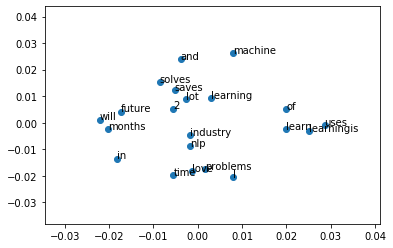

In [64]:
import matplotlib.pyplot as pyplot
X = w2v[w2v.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(w2v.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()